In [1]:
using MonoidalCategories,FiniteTensorSignatures,Representations,WiresBoxes,IntMat

INFO: Instance delcaration omitted method transpose(f::Mat) is already defined, skipping specializing ClosedCompactCategory class method


In [37]:
fts"T;ϵ:V→V,Ψ:I→V⊗V⊗V" #equivalent to
#T=FTS("ϵ:V→V,Ψ:I→V⊗V⊗V")
#Ψ=MW(:Ψ,T)
#ϵ=MW(:ϵ,T)
#V=FiniteTensorSignatures.ObjectWord(OWord(:V),T)

{Ψ:I→V⊗V⊗V,ϵ:V→V}

In [3]:
cod(Ψ)

V⊗V⊗V over {Ψ:I→V⊗V⊗V,ϵ:V→V}

In [35]:
# these dictionary defs can be automated
#diaObDict={:V=>Wires(1),:I=>munit(Wires(1))};
diaObDict={:V=>Wires(1),:V_=>Wires(1)};
diaMorDict={:ϵ=>mbox(1,1,"ϵ"),:Ψ=>ket(3,"Ψ"),:Ψd=>bra(3,"Ψ")};
diagram=Representation(T,DaggerClosedCompactCategory,diaObDict,diaMorDict);

In [5]:
dom(ϵ^{⊗6}).contents

OWord(:(⊗(⊗(⊗(⊗(⊗(V,V),V),V),V),V)))

In [6]:
cod(Ψ⊗Ψ).contents #OWord must implement associative comparison

OWord(:(⊗(⊗(⊗(V,V),V),⊗(⊗(V,V),V))))

In [7]:
dom(ϵ^{⊗6}).contents==cod(Ψ⊗Ψ).contents

true

In [8]:
ϵ^{⊗6} ∘ (Ψ⊗Ψ)

∘(⊗(⊗(⊗(⊗(⊗(ϵ,ϵ),ϵ),ϵ),ϵ),ϵ),⊗(Ψ,Ψ)):I→V⊗V⊗V⊗V⊗V⊗V over {Ψ:I→V⊗V⊗V,ϵ:V→V}

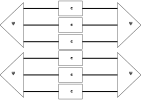

In [9]:
diagram.value((Ψ'⊗Ψ')∘ϵ^{⊗6} ∘ (Ψ⊗Ψ))

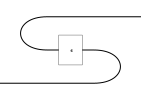

In [36]:
diagram.value(ϵ.')

In [10]:
id(V⊗V)

id(⊗(V,V)):V⊗V→V⊗V over {Ψ:I→V⊗V⊗V,ϵ:V→V}

In [11]:
bip1=Ψ'∘(id(V)⊗ϵ⊗ϵ)∘ Ψ

∘(∘(Ψd,⊗(⊗(id(V),ϵ),ϵ)),Ψ):I→I over {Ψ:I→V⊗V⊗V,ϵ:V→V}

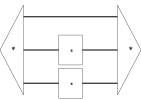

In [12]:
diagram.value(bip1)

In [13]:
using BinBraKet

In [14]:
#Seven Orbits
Zero = zeros(8,1);
W=ket"001"+ket"010"+ket"100";
GHZ=ket"000"+ket"111";
b1=ket"0"⊗coev(2);
b2=(sigma(2,2)⊗id(2))∘(ket"0"⊗coev(2));
b3=coev(2)⊗ket"0";
pr=ket"0"⊗ket"0"⊗ket"0";


In [15]:
intmatObDict={:V=>2,:I=>munit(1)};
intmatMorDict={
        :ϵ=>ket"0"∘bra"1" - ket"1"∘bra"0",
        :Ψ=>W,
    :Ψd=>W' #automate me as Ψ' delegated to F(Ψ)' inside Representation constructor
    };
        
intmat=Representation(T,DaggerClosedCompactCategory,intmatObDict,intmatMorDict);

In [16]:
bip1

∘(∘(Ψd,⊗(⊗(id(V),ϵ),ϵ)),Ψ):I→I over {Ψ:I→V⊗V⊗V,ϵ:V→V}

In [17]:
intmat.value(bip1)

1x1 Array{Float64,2}:
 -2.0

In [18]:
intmat.value(id(V⊗V))

4x4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [19]:
# Graphical Invariants
norm2= Ψ'∘Ψ; # ' is conjugate transpose
#bipartite invariants
#bip1=Ψ'∘(id(V)⊗ϵ⊗ϵ)∘Ψ; 
bip2=Ψ'∘(ϵ⊗id(V)⊗ϵ)∘Ψ; 
bip3=Ψ'∘(ϵ⊗ϵ⊗id(V))∘Ψ; 

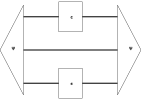

In [20]:
diagram.value(bip2)

In [21]:
intmat.value(bip2)

1x1 Array{Float64,2}:
 -2.0

In [22]:
#to consider multiple invariants we need a parameterizes or partial representation

In [23]:
function intmatof(state)
    intmatObDict={:V=>2,:I=>munit(1)}
    intmatMorDict={:ϵ=>ket"0"∘bra"1" - ket"1"∘bra"0", :Ψ=>state, :Ψd=>state'} 
    Representation(T,DaggerClosedCompactCategory,intmatObDict,intmatMorDict); #need to add PSMs
end     

intmatof (generic function with 1 method)

In [24]:
intmatof(GHZ).value(norm2)

1x1 Array{Float64,2}:
 2.0

In [25]:
#Norm distinguishes the zero orbit
map(x->intmatof(x).value(norm2)[1],(GHZ,W,b1,b2,b3,pr,Zero)) #the [1] unboxes a 1x1 array

(2.0,3.0,2.0,2.0,2.0,1.0,0.0)

In [26]:
#bipartite invariants distinguish bipartite states from each other
[intmatof(state).value(invariant)[1] for state in (b1,b2,b3), invariant in [bip1 bip2 bip3]] #tuple to prevent concat

3x3 Array{Any,2}:
 2.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  2.0

In [27]:
#Bipartite invariants nonzero on W and zero on GHZ
[intmatof(W).value(bip1) intmatof(W).value(bip2) intmatof(W).value(bip3);
    intmatof(GHZ).value(bip1) intmatof(GHZ).value(bip2) intmatof(GHZ).value(bip3)]

2x3 Array{Float64,2}:
 -2.0  -2.0  -2.0
  0.0   0.0   0.0

In [28]:
#for the hyperdeterminant we need swaps
σ=sigma(V,V); #use the default IntMat braiding
swap14 = (σ⊗σ)∘(id(V)⊗σ⊗id(V))∘(σ⊗σ);
hypdet=(Ψ'⊗Ψ')∘(id(V)⊗id(V)⊗swap14)∘(ϵ⊗ϵ⊗ϵ⊗ϵ⊗ϵ⊗ϵ)∘(Ψ⊗Ψ); #need to get swap diagram in properly

∘(∘(∘(⊗(Ψd,Ψd),⊗(⊗(id(V),id(V)),∘(∘(⊗(sigma(V,V),sigma(V,V)),⊗(⊗(id(V),sigma(V,V)),id(V))),⊗(sigma(V,V),sigma(V,V))))),⊗(⊗(⊗(⊗(⊗(ϵ,ϵ),ϵ),ϵ),ϵ),ϵ)),⊗(Ψ,Ψ)):I→I over {Ψ:I→V⊗V⊗V,ϵ:V→V}

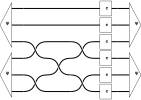

In [32]:
diagram.value(hypdet)

In [29]:
map(x->intmatof(x).value(hypdet)[1],(GHZ,W,b1,b2,b3,pr,Zero)) #the [1] unboxes a 1x1 array

(2.0,0.0,0.0,0.0,0.0,0.0,0.0)

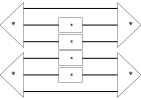

In [31]:
diagram.value(bip1⊗bip3)